In [188]:
# print_function for compatibility with Python 3
from __future__ import print_function 
#print('Print function from python 3')

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

import calendar
import datetime

In [189]:
df = pd.read_csv('turnstile_180310.txt')

In [190]:
df.columns = df.columns.str.strip()

In [191]:
df['turnstile_id'] = df['C/A'] + '_' + df['UNIT'] + '_' + df['SCP'] + '_' + df['STATION']

In [192]:
df['date'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')

In [193]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile_id,date
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,03:00:00,REGULAR,6535802,2213345,A002_R051_02-00-00_59 ST,2018-03-03
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,07:00:00,REGULAR,6535813,2213356,A002_R051_02-00-00_59 ST,2018-03-03
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,11:00:00,REGULAR,6535865,2213436,A002_R051_02-00-00_59 ST,2018-03-03
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,15:00:00,REGULAR,6536048,2213481,A002_R051_02-00-00_59 ST,2018-03-03
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,19:00:00,REGULAR,6536326,2213531,A002_R051_02-00-00_59 ST,2018-03-03


In [194]:
df['DATE_TIME'] = df['DATE'] + '_' + df['TIME']

In [195]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'],format="%m/%d/%Y_%H:%M:%S")

In [196]:
df.sample(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile_id,date,DATE_TIME
51053,N067,R012,00-00-02,34 ST-PENN STA,ACE,IND,03/06/2018,07:00:00,REGULAR,8031881,10645095,N067_R012_00-00-02_34 ST-PENN STA,2018-03-06,2018-03-06 07:00:00
196276,R645,R110,00-06-02,FLATBUSH AV-B.C,25,IRT,03/07/2018,20:00:00,REGULAR,18223072,7697960,R645_R110_00-06-02_FLATBUSH AV-B.C,2018-03-07,2018-03-07 20:00:00
21906,C014,R246,00-03-00,PROSPECT AV,R,BMT,03/03/2018,07:00:00,REGULAR,8317481,3237566,C014_R246_00-03-00_PROSPECT AV,2018-03-03,2018-03-03 07:00:00
156924,R244A,R050,01-00-04,59 ST,456NQRW,IRT,03/03/2018,03:00:00,REGULAR,4131496,704247,R244A_R050_01-00-04_59 ST,2018-03-03,2018-03-03 03:00:00
134781,R155,R116,01-00-01,50 ST,1,IRT,03/04/2018,07:00:00,REGULAR,10892983,4099338,R155_R116_01-00-01_50 ST,2018-03-04,2018-03-04 07:00:00
40873,K026,R100,00-05-00,METROPOLITAN AV,M,BMT,03/07/2018,07:00:00,REGULAR,150995018,169,K026_R100_00-05-00_METROPOLITAN AV,2018-03-07,2018-03-07 07:00:00
13559,B009,R411,00-00-02,PARK PLACE,S,BMT,03/05/2018,08:00:00,REGULAR,4013904,4796561,B009_R411_00-00-02_PARK PLACE,2018-03-05,2018-03-05 08:00:00
59225,N098,R028,00-00-01,FULTON ST,2345ACJZ,IND,03/03/2018,14:00:00,REGULAR,18635100,8468079,N098_R028_00-00-01_FULTON ST,2018-03-03,2018-03-03 14:00:00
167183,R311,R053,00-00-00,3 AV-149 ST,25,IRT,03/08/2018,19:00:00,REGULAR,4867410,5702560,R311_R053_00-00-00_3 AV-149 ST,2018-03-08,2018-03-08 19:00:00
117841,PTH13,R541,00-04-03,THIRTY ST,1,PTH,03/09/2018,01:34:47,REGULAR,403697,42611,PTH13_R541_00-04-03_THIRTY ST,2018-03-09,2018-03-09 01:34:47


In [197]:
df_temp=df[['turnstile_id','date','DATE_TIME','ENTRIES','EXITS','STATION', 'DATE', 'TIME']]

In [198]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199116 entries, 0 to 199115
Data columns (total 8 columns):
turnstile_id    199116 non-null object
date            199116 non-null datetime64[ns]
DATE_TIME       199116 non-null datetime64[ns]
ENTRIES         199116 non-null int64
EXITS           199116 non-null int64
STATION         199116 non-null object
DATE            199116 non-null object
TIME            199116 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 12.2+ MB


In [199]:
df_temp.sample(10)

,turnstile_id,date,DATE_TIME,ENTRIES,EXITS,STATION,DATE,TIME
138919,R169_R168_01-00-01_96 ST,2018-03-06,2018-03-06 12:00:00,983032,589767,96 ST,03/06/2018,12:00:00
139187,R169_R168_01-03-01_96 ST,2018-03-09,2018-03-09 04:00:00,452461,1085257,96 ST,03/09/2018,04:00:00
121099,PTH19_R549_02-02-03_NEWARK C,2018-03-05,2018-03-05 19:47:02,153585,4597,NEWARK C,03/05/2018,19:47:02
81982,N327_R254_00-06-00_GRAND-NEWTOWN,2018-03-04,2018-03-04 15:00:00,2969049,462663,GRAND-NEWTOWN,03/04/2018,15:00:00
73819,N223_R156_01-05-01_BEDFORD PK BLVD,2018-03-04,2018-03-04 08:00:00,458752,20,BEDFORD PK BLVD,03/04/2018,08:00:00
28489,G001_R151_00-03-03_CONEY IS-STILLW,2018-03-05,2018-03-05 04:00:00,2211957,404931,CONEY IS-STILLW,03/05/2018,04:00:00
143825,R197_R117_00-00-01_V.CORTLANDT PK,2018-03-09,2018-03-09 15:00:00,3254832,1547146,V.CORTLANDT PK,03/09/2018,15:00:00
63107,N119_R199_00-00-02_KINGSTON-THROOP,2018-03-06,2018-03-06 07:00:00,4537843,1198932,KINGSTON-THROOP,03/06/2018,07:00:00
177746,R508_R346_00-00-00_COURT SQ,2018-03-04,2018-03-04 23:00:00,2717539,4025896,COURT SQ,03/04/2018,23:00:00
91802,N419_R287_00-00-00_CLASSON AV,2018-03-05,2018-03-05 23:00:00,2488269,2586435,CLASSON AV,03/05/2018,23:00:00


In [206]:
df_temp1=(df_temp
 .sort_values(by=['turnstile_id','DATE_TIME'])
 .groupby(['turnstile_id','date','STATION'])
 .diff())

In [207]:
df_temp1.head(10)

,DATE_TIME,ENTRIES,EXITS
0,NaT,NaN,NaN
1,04:00:00,11.0,11.0
2,04:00:00,52.0,80.0
3,04:00:00,183.0,45.0
4,04:00:00,278.0,50.0
5,04:00:00,161.0,31.0
6,NaT,NaN,NaN
7,04:00:00,8.0,9.0
8,04:00:00,50.0,47.0
9,04:00:00,147.0,43.0


In [208]:
# whats the point of this??
df_temp2=(df_temp
 .sort_values(by=['turnstile_id','DATE_TIME']))

In [209]:
df_temp2.head()

,turnstile_id,date,DATE_TIME,ENTRIES,EXITS,STATION,DATE,TIME
0,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 03:00:00,6535802,2213345,59 ST,03/03/2018,03:00:00
1,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 07:00:00,6535813,2213356,59 ST,03/03/2018,07:00:00
2,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 11:00:00,6535865,2213436,59 ST,03/03/2018,11:00:00
3,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 15:00:00,6536048,2213481,59 ST,03/03/2018,15:00:00
4,A002_R051_02-00-00_59 ST,2018-03-03,2018-03-03 19:00:00,6536326,2213531,59 ST,03/03/2018,19:00:00


In [210]:
df_temp1['turnstile_id']=df_temp2['turnstile_id']

In [211]:
df_temp1['STATION']=df_temp2['STATION']

In [255]:
df_temp1['date']=df_temp2['date']
df_temp1['DATE_TIME']=df_temp2['DATE_TIME']

In [257]:
df_temp1.head(20)

,DATE_TIME,ENTRIES,EXITS,turnstile_id,STATION,date
1,2018-03-03 07:00:00,11.0,11.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
2,2018-03-03 11:00:00,52.0,80.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
3,2018-03-03 15:00:00,183.0,45.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
4,2018-03-03 19:00:00,278.0,50.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
5,2018-03-03 23:00:00,161.0,31.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03
7,2018-03-04 07:00:00,8.0,9.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04
8,2018-03-04 11:00:00,50.0,47.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04
9,2018-03-04 15:00:00,147.0,43.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04
10,2018-03-04 19:00:00,196.0,46.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04
11,2018-03-04 23:00:00,118.0,20.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04


In [258]:
df_temp1.dropna(axis=0,inplace=True)

In [273]:
df_final=pd.DataFrame()
df_final=df_temp1[['ENTRIES', 'EXITS','turnstile_id','STATION','date', 'DATE_TIME']]

In [274]:
df_final.head()

,ENTRIES,EXITS,turnstile_id,STATION,date,DATE_TIME
1,11.0,11.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,2018-03-03 07:00:00
2,52.0,80.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,2018-03-03 11:00:00
3,183.0,45.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,2018-03-03 15:00:00
4,278.0,50.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,2018-03-03 19:00:00
5,161.0,31.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,2018-03-03 23:00:00


# -- divert from 'df_final'

In [261]:
df_final1=(df_final
 .groupby(['turnstile_id','date','STATION'])
 .sum())

In [262]:
print(df_final1['ENTRIES'].max())
print(df_final1['EXITS'].max())

10128.0
10866.0


In [263]:
df_analyze=df_final1.reset_index()

In [264]:
df_final1.columns

Index(['ENTRIES', 'EXITS'], dtype='object')

In [265]:
df_analyze.head()

,turnstile_id,date,STATION,ENTRIES,EXITS
0,A002_R051_02-00-00_59 ST,2018-03-03,59 ST,685.0,217.0
1,A002_R051_02-00-00_59 ST,2018-03-04,59 ST,519.0,165.0
2,A002_R051_02-00-00_59 ST,2018-03-05,59 ST,1379.0,490.0
3,A002_R051_02-00-00_59 ST,2018-03-06,59 ST,1472.0,534.0
4,A002_R051_02-00-00_59 ST,2018-03-07,59 ST,979.0,421.0


In [266]:
top_20_station_ex=df_analyze.sort_values(by='EXITS',ascending=False).head(68)

In [267]:
print(top_20_station['STATION'].unique())
print(len(top_20_station['STATION'].unique()))

['GRD CNTRL-42 ST' '59 ST COLUMBUS' 'BROADWAY' 'JAMAICA CENTER'
 'WOODHAVEN BLVD' 'BEDFORD AV' '1 AV' '14 ST-UNION SQ' '57 ST-7 AV'
 '34 ST-HERALD SQ']
10


Text(0.5,0,'STATION')

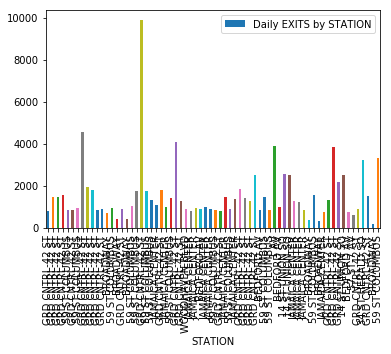

In [268]:
top_20_station.plot(kind='bar', x='STATION', y='EXITS',label='Daily EXITS by STATION')
plt.xlabel('STATION')

# use 'df_final'

In [275]:
df_final.columns

Index(['ENTRIES', 'EXITS', 'turnstile_id', 'STATION', 'date', 'DATE_TIME'], dtype='object')

In [281]:
df_final_date = df_final[['ENTRIES', 'EXITS','turnstile_id','STATION','date', 'DATE_TIME']]
df_final_date.head()

,ENTRIES,EXITS,turnstile_id,STATION,date,DATE_TIME
1,11.0,11.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,2018-03-03 07:00:00
2,52.0,80.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,2018-03-03 11:00:00
3,183.0,45.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,2018-03-03 15:00:00
4,278.0,50.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,2018-03-03 19:00:00
5,161.0,31.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,2018-03-03 23:00:00


### Build df to summarize stations by DATE

In [282]:
df_final_date = df_final_date.set_index('date')

In [284]:
df_final_datetime.groupby(['STATION', 'date'])[['ENTRIES','EXITS']].sum()

ENTRIES    EXITS
STATION         date                        
1 AV            2018-03-03  15833.0  19246.0
                2018-03-04  11946.0  13740.0
                2018-03-05  20623.0  22574.0
                2018-03-06  21454.0  23983.0
                2018-03-07  16537.0  19000.0
                2018-03-08  21573.0  23114.0
                2018-03-09  23388.0  26134.0
103 ST          2018-03-03  15838.0  11044.0
                2018-03-04  12676.0   9645.0
                2018-03-05  28506.0  18107.0
                2018-03-06  29643.0  18248.0
                2018-03-07  23009.0  15377.0
                2018-03-08  29629.0  18014.0
                2018-03-09  29917.0  18042.0
103 ST-CORONA   2018-03-03  10869.0   9075.0
                2018-03-04   6999.0   6646.0
                2018-03-05  19782.0  12469.0
                2018-03-06  20256.0  12649.0
                2018-03-07  16049.0  10696.0
                2018-03-08  20208.0  12566.0
                2018-03-09  20293.0  12311.0
104 ST          2018-03-03    625.0    334.0
                2018-03-04    483.0    246.0
                2018-03-05   2467.0    808.0
                2018-03-06   2623.0    777.0
                2018-03-07   1898.0    618.0
                2018-03-08   2407.0    761.0
                2018-03-09   2442.0    745.0
110 ST          2018-03-03   6879.0   5826.0
                2018-03-04   4932.0   4905.0
...                             ...      ...
WOODHAVEN BLVD  2018-03-08  24938.0  11623.0
                2018-03-09  26586.0  14027.0
WOODLAWN        2018-03-03   3739.0    877.0
                2018-03-04   2685.0    633.0
                2018-03-05   7110.0   1519.0
                2018-03-06   7185.0   1408.0
                2018-03-07   4407.0   1012.0
                2018-03-08   6944.0   1343.0
                2018-03-09   7111.0   1481.0
WORLD TRADE CTR 2018-03-03   7524.0   7027.0
                2018-03-04   5902.0   5325.0
                2018-03-05  16851.0  12769.0
                2018-03-06  17761.0  12497.0
                2018-03-07  11139.0   8548.0
                2018-03-08  16901.0  12276.0
                2018-03-09  18547.0  13308.0
YORK ST         2018-03-03   4917.0   2696.0
                2018-03-04   4028.0   2164.0
                2018-03-05   9907.0   3411.0
                2018-03-06  10200.0   3477.0
                2018-03-07   7277.0   2487.0
                2018-03-08   9691.0   3452.0
                2018-03-09   9971.0   2926.0
ZEREGA AV       2018-03-03   1149.0    975.0
                2018-03-04    922.0    776.0
                2018-03-05   2760.0   2154.0
                2018-03-06   2777.0   2237.0
                2018-03-07   2019.0   1760.0
                2018-03-08   2651.0   2028.0
                2018-03-09   2664.0   2110.0

[2603 rows x 2 columns]

### Build df to summarize stations by DATE_TIME

In [285]:
df_final_datetime = df_final[['ENTRIES', 'EXITS','turnstile_id','STATION','date', 'DATE_TIME']]
df_final_datetime.groupby(['STATION', 'DATE_TIME'])[['ENTRIES','EXITS']].sum()

ENTRIES   EXITS
STATION   DATE_TIME                           
1 AV      2018-03-03 07:00:00    370.0   550.0
          2018-03-03 11:00:00   1907.0  2716.0
          2018-03-03 15:00:00   4066.0  4454.0
          2018-03-03 19:00:00   4946.0  6159.0
          2018-03-03 23:00:00   4544.0  5367.0
          2018-03-04 07:00:00    433.0   486.0
          2018-03-04 11:00:00   1399.0  1708.0
          2018-03-04 15:00:00   3322.0  3697.0
          2018-03-04 19:00:00   4150.0  4788.0
          2018-03-04 23:00:00   2642.0  3061.0
          2018-03-05 07:00:00    546.0  1373.0
          2018-03-05 11:00:00   5370.0  6941.0
          2018-03-05 15:00:00   3567.0  3774.0
          2018-03-05 19:00:00   7283.0  6084.0
          2018-03-05 23:00:00   3857.0  4402.0
          2018-03-06 07:00:00    490.0  1326.0
          2018-03-06 11:00:00   5341.0  7384.0
          2018-03-06 15:00:00   3581.0  3848.0
          2018-03-06 19:00:00   7818.0  6511.0
          2018-03-06 23:00:00   4224.0  4914.0
          2018-03-07 07:00:00    501.0  1279.0
          2018-03-07 11:00:00   4563.0  6088.0
          2018-03-07 15:00:00   3858.0  4013.0
          2018-03-07 19:00:00   5474.0  5054.0
          2018-03-07 23:00:00   2141.0  2566.0
          2018-03-08 07:00:00    511.0  1292.0
          2018-03-08 11:00:00   5402.0  7459.0
          2018-03-08 15:00:00   3536.0  3948.0
          2018-03-08 19:00:00   7598.0  5891.0
          2018-03-08 23:00:00   4526.0  4524.0
...                                ...     ...
ZEREGA AV 2018-03-04 04:00:00     14.0    80.0
          2018-03-04 08:00:00    145.0    62.0
          2018-03-04 12:00:00    263.0   158.0
          2018-03-04 16:00:00    319.0   217.0
          2018-03-04 20:00:00    181.0   259.0
          2018-03-05 04:00:00     19.0    63.0
          2018-03-05 08:00:00    934.0   375.0
          2018-03-05 12:00:00    742.0   396.0
          2018-03-05 16:00:00    579.0   495.0
          2018-03-05 20:00:00    486.0   825.0
          2018-03-06 04:00:00     24.0    93.0
          2018-03-06 08:00:00    983.0   374.0
          2018-03-06 12:00:00    754.0   426.0
          2018-03-06 16:00:00    544.0   447.0
          2018-03-06 20:00:00    472.0   897.0
          2018-03-07 04:00:00     18.0   117.0
          2018-03-07 08:00:00    763.0   307.0
          2018-03-07 12:00:00    584.0   322.0
          2018-03-07 16:00:00    407.0   455.0
          2018-03-07 20:00:00    247.0   559.0
          2018-03-08 04:00:00     21.0    63.0
          2018-03-08 08:00:00    913.0   347.0
          2018-03-08 12:00:00    708.0   331.0
          2018-03-08 16:00:00    540.0   465.0
          2018-03-08 20:00:00    469.0   822.0
          2018-03-09 04:00:00     26.0   102.0
          2018-03-09 08:00:00    920.0   343.0
          2018-03-09 12:00:00    711.0   350.0
          2018-03-09 16:00:00    516.0   537.0
          2018-03-09 20:00:00    491.0   778.0

[24392 rows x 2 columns]

In [286]:
# day of week...
#.   df['day_of_week'] = df['my_dates'].dt.weekday_name
df_final_datetime['day_of_week'] = df_final_datetime['DATE_TIME'].dt.weekday_name
df_final_datetime.head()

,ENTRIES,EXITS,turnstile_id,STATION,date,DATE_TIME,day_of_week
1,11.0,11.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,2018-03-03 07:00:00,Saturday
2,52.0,80.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,2018-03-03 11:00:00,Saturday
3,183.0,45.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,2018-03-03 15:00:00,Saturday
4,278.0,50.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,2018-03-03 19:00:00,Saturday
5,161.0,31.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,2018-03-03 23:00:00,Saturday


In [288]:
df_final_datetime.set_index('DATE_TIME')

,ENTRIES,EXITS,turnstile_id,STATION,date,day_of_week
DATE_TIME,,,,,,
2018-03-03 07:00:00,11.0,11.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,Saturday
2018-03-03 11:00:00,52.0,80.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,Saturday
2018-03-03 15:00:00,183.0,45.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,Saturday
2018-03-03 19:00:00,278.0,50.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,Saturday
2018-03-03 23:00:00,161.0,31.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-03,Saturday
2018-03-04 07:00:00,8.0,9.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04,Sunday
2018-03-04 11:00:00,50.0,47.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04,Sunday
2018-03-04 15:00:00,147.0,43.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04,Sunday
2018-03-04 19:00:00,196.0,46.0,A002_R051_02-00-00_59 ST,59 ST,2018-03-04,Sunday


In [289]:
df_59st = df_final_datetime[df_final_datetime.STATION == '59 ST']
df_59st.sample(10)

,ENTRIES,EXITS,turnstile_id,STATION,date,DATE_TIME,day_of_week
157144,17.0,155.0,R245_R051_00-03-01_59 ST,59 ST,2018-03-04,2018-03-04 11:00:00,Sunday
323,270.0,1.0,A002_R051_02-03-05_59 ST,59 ST,2018-03-07,2018-03-07 23:00:00,Wednesday
157122,85.0,42.0,R245_R051_00-03-00_59 ST,59 ST,2018-03-07,2018-03-07 23:00:00,Wednesday
156646,14.0,87.0,R244_R050_00-06-00_59 ST,59 ST,2018-03-06,2018-03-06 07:00:00,Tuesday
157220,145.0,-585.0,R245_R051_00-03-02_59 ST,59 ST,2018-03-09,2018-03-09 19:00:00,Friday
470,58.0,0.0,A002_R051_02-06-00_59 ST,59 ST,2018-03-04,2018-03-04 11:00:00,Sunday
156997,1.0,43.0,R244A_R050_01-06-00_59 ST,59 ST,2018-03-08,2018-03-08 07:00:00,Thursday
157327,56.0,40.0,R245_R051_00-05-01_59 ST,59 ST,2018-03-06,2018-03-06 07:00:00,Tuesday
157536,4.0,122.0,R245A_R051_01-00-03_59 ST,59 ST,2018-03-05,2018-03-05 07:00:00,Monday
156935,142.0,33.0,R244A_R050_01-00-04_59 ST,59 ST,2018-03-04,2018-03-04 23:00:00,Sunday


In [295]:
#df_59st.groupby('day_of_week')[['ENTRIES','EXITS']].sum()

,ENTRIES,EXITS
day_of_week,,
Friday,60632.0,50690.0
Monday,58813.0,48894.0
Saturday,30474.0,25557.0
Sunday,21905.0,18743.0
Thursday,59888.0,50311.0
Tuesday,63091.0,51845.0
Wednesday,42411.0,36002.0


In [303]:
kelly_df = df_final_datetime.groupby(['STATION', 'date'], as_index=False).sum()
kelly_df.set_index('STATION', inplace=True)
kelly_df.sample(50)

,date,ENTRIES,EXITS
STATION,,,
21 ST-QNSBRIDGE,2018-03-05,10762.0,6259.0
42 ST-PORT AUTH,2018-03-09,75571.0,71378.0
174 ST,2018-03-07,2996.0,3045.0
46 ST,2018-03-09,9062.0,6729.0
YORK ST,2018-03-03,4917.0,2696.0
TIMES SQ-42 ST,2018-03-06,93671.0,89901.0
MYRTLE AV,2018-03-09,13038.0,4973.0
23 ST,2018-03-09,106769.0,81800.0
CHAUNCEY ST,2018-03-09,3630.0,1361.0


In [304]:
#kelly_df.to_csv(r'\Users\jas\Desktop\jstationcsv.csv')